# Projeto - Estudando A Guerra da Ucrânia com Informação Georreferenciada

**Disciplina:** Informação Georreferênciada

**Autores:** Bernardo Cunha Capoferri, Francisco Pinheiro Janela

# Contexto
Na Ucrânia, após a revolução no início de 2014, que levou a queda do governo de Viktor Yanukovich, russófilo, e a instalação de um novo governo eurocêntrico, 
protestos pro-Rússia irromperam em muitas regiões do país, especialmente ao leste, nos oblasts de Donetsk e Luhansk, que possuem fortes laços linguísticos ao gigante vizinho.
A situação não demorou para deteriorar para Kyiv, com os russos anexando a região inteira da Criméia e financiando e fomentando sentimentos separatistas nas regiões mais próximas a suas fronteiras
que resultou na declaração das repúblicas populares de Donetsk e Luhansk e o início de uma guerra civil que em 2024 teria 10 anos de continuidade.

<img src="imgs/2014_pro-Russian_unrest_in_Ukraine.png" alt="2014_unrest" width="600"/>

Áreas de agitação pró-Rússia em 2014

By RGloucester - This vector image includes elements that have been taken or adapted from this file:, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=32112254


<img src="imgs/Donbas_(2015–2022).svg" alt="Donbass_republics" width="600"/>

Áreas ocupadas por separatistas das repúblicas de Donetsk e Luhansk antes de 24 de fev. 2022

By Goran_tek-en, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=115933072">Link</a>

No final de 2021 e início de 2022, tensões entre Ucrânia e Rússia aumentaram substancialmente. Os Russos aumentaram sua presença militar em suas fronteiras com seu vizinho eslavo,
culminando no reconhecimento formal das repúblicas separatistas em 23 de fevereiro de 2022, e no dia seguinte, Putin declarou o início de um "Operação militar especial", que de acordo com o presidente da Federação Russa tinha como um de seus objetivos a defesa de Russos contra "genocídio" perpetrado pelo governo em Kyiv: 

"[...] A este respeito e sobre a situação em Donbass. Vemos que as forças que realizaram um golpe de Estado na Ucrânia em 
2014 tomaram o poder e o mantêm com sua ajuda, em essência, por meio de procedimentos eleitorais decorativos, e recusaram 
definitivamente uma resolução pacífica do conflito. Por oito anos, oito anos infinitamente longos, fizemos todo o possível 
para que a situação fosse resolvida por meios pacíficos e políticos. Tudo em vão.

Como já disse em meu discurso anterior, não se pode olhar para o que está acontecendo ali sem pena. Então, isso tudo já era 
impossível. Era preciso pôr fim imediatamente a esse pesadelo: um genocídio voltado contra milhões de pessoas que lá vivem 
e cuja única esperança está na Rússia, pessoas que só têm esperança em nós, ou seja, em mim e em vocês. Foram justamente 
essas intenções, esses sentimentos, a dor das pessoas o principal motivo de nossa decisão de reconhecer as repúblicas 
populares de Donbass. [...]

[...] O mesmo ocorre agora. Nós, eu e você, simplesmente ficamos sem outra maneira de proteger a Rússia, o nosso povo, além 
daquela que seremos forçados a usar hoje. As circunstâncias demandam de nós ações decisivas e imediatas. As Repúblicas 
Populares de Donbass entraram em contato com a Rússia com um pedido de ajuda. [...]"

fonte: https://www1.folha.uol.com.br/mundo/2022/02/veja-integra-do-discurso-de-putin-que-anunciou-a-invasao.shtml

A tentativa de uma invasão relâmpago, que caracterizou as primeiras semanas foi um fracasso, com os ucranianos recuperando mais de 50% do território conquistado desde o início da invasão formal. Na data na qual este texto foi escrito (13/12/23) a guerra parece garantida a perdurar por 2024 e além, com regiões inteiras do país sendo reduzidas a escombros e com milhões de cidadãos ucranianos deslocados e estimativas extremamente conservadoras de dezenas de milhares de mortos.

<img src="imgs/2022_Russian invasion_of_Ukraine.svg" alt="Russian_invasion" width="1000" />

Extensão máxima do território invadido pelos Russos em azul, com áreas em vermelho ainda sendo ocupadas (até 13 de dezembro de 2023)

By Viewsridge - Own work based on: Russo-Ukrainian conflict (2014-2022).svg by Rr016 &amp; Ukraine adm location map improved.svg by Yakiv GluckTerritorial control sources:Template:Russo-Ukrainian War detailed map / Template:Russo-Ukrainian War detailed relief mapISW, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=115506141

<img src="imgs/Marinka.jpeg" alt="Donbass_republics"/>

Devastação da cidade de Marinka, região de Donetsk, Ucrânia

By Танкисты ЮВО - https://t.me/tankistrossii100/935, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=132854658



# Objetivo
O Objetivo deste projeto e verificar se as ações das forças armadas russas condizem o objetivo do seu chefe de estado de proteger falantes da língua russa e simpatizantes na Ucrânia, por meio da análise de dados eleitorais, demográficos (relacionado a língua nativa) e os incêndios detectados pelos satelites do programa FIRMS da NASA para estimar regiões onde estava ocorrendo combate intenso.

- EPSG: 6381

### Importando Bibliotecas

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

## Importando Dados

In [2]:
df_pull_stations = pd.read_csv('../data/pull_stations.csv')
df_pull_stations = df_pull_stations.iloc[228:-1].reset_index(drop=True)
df_pull_stations.head()

id  parent_id  level         name             region tikId city  \
0  228         27      3  ВД № 050130  Вінницька область    11  NaN   
1  229         27      3  ВД № 050131  Вінницька область    11  NaN   
2  230         27      3  ВД № 050132  Вінницька область    11  NaN   
3  231         27      3  ВД № 050133  Вінницька область    11  NaN   
4  232         27      3  ВД № 050134  Вінницька область    11  NaN   

         lat        lon  
0  49.306361  28.468460  
1  49.308055  28.471841  
2  49.310606  28.472663  
3  49.304283  28.482872  
4  49.331720  28.533021

In [3]:
df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')
df_voting_results.head()

C:\Users\Bernardo\AppData\Local\Temp\ipykernel_9364\2159070499.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_voting_results = pd.read_csv('../data/results_2019_12_47b.csv', sep=';')


tikId         name  voters  totalVotes  Балашов Геннадій  Безсмертний Роман  \
0    11  ВД № 050130    1686        1121                 3                  2   
1    11  ВД № 050131    2109        1358                 1                  2   
2    11  ВД № 050132    1282         841                 1                  0   
3    11  ВД № 050133    2434        1594                 2                  0   
4    11  ВД № 050134     225         140                 1                  0   

   Богомолець Ольга  Богословська Інна  Бойко Юрій  Бондар Віктор  \
0                 2                  0          32              0   
1                 1                  2          47              1   
2                 2                  1          41              0   
3                 4                  2          55              1   
4                 1                  0           1              0   

   Ващенко Олександр  Вілкул Олександр  Габер Микола  Гриценко Анатолій  \
0                  0                11             0                 73   
1                  1                33             0                 97   
2                  0                10             0                 48   
3                  1                29             0                 94   
4                  0                 1             0                 12   

   Данилюк Олександр  Дерев’янко Юрій  Журавльов Василь  Зеленський Володимир  \
0                  0                2                 1                   232   
1                  0                0                 0                   319   
2                  0                1                 1                   204   
3                  1                1                 0                   320   
4                  0                0                 0                    36   

   Каплін Сергій  Кармазін Юрій  Кива Ілля  Корнацький Аркадій  \
0              0              0          0                   0   
1              1              1          1                   1   
2              0              0          3                   0   
3              0              0          1                   0   
4              0              0          0                   0   

   Кошулинський Руслан  Кривенко Віктор  Купрій Віталій  Литвиненко Юлія  \
0                   17                0               0                1   
1                   23                0               1                1   
2                   12                0               0                1   
3                   31                2               0                2   
4                    3                0               0                0   

   Ляшко Олег  Мороз Олександр  Наливайченко Валентин  Насіров Роман  \
0          45                1                      2              0   
1          46                0                      4              0   
2          35                0                      1              0   
3          61                1                      7              0   
4           3                1                      1              0   

   Новак Андрій  Носенко Сергій  Петров Володимир  Порошенко Петро  \
0             0               1                 0              370   
1             0               0                 1              365   
2             0               0                 2              247   
3             1               0                 0              524   
4             0               0                 0               39   

   Ригованов Руслан  Скоцик Віталій  Смешко Ігор  Соловйов Олександр  \
0                 1               1          120                   0   
1                 0               2          147                   0   
2                 0               0           95                   2   
3                 0               3          186                   0   
4                 0               0           14                   0   

   Тарута Сергій  Тим

In [4]:
df_pull_stations.columns

Index(['id', 'parent_id', 'level', 'name', 'region', 'tikId', 'city', 'lat',
       'lon'],
      dtype='object')

In [5]:
df_voting_results.columns

Index(['tikId', 'name', 'voters', 'totalVotes', 'Балашов Геннадій',
       'Безсмертний Роман', 'Богомолець Ольга', 'Богословська Інна',
       'Бойко Юрій', 'Бондар Віктор', 'Ващенко Олександр', 'Вілкул Олександр',
       'Габер Микола', 'Гриценко Анатолій', 'Данилюк Олександр',
       'Дерев’янко Юрій', 'Журавльов Василь', 'Зеленський Володимир',
       'Каплін Сергій', 'Кармазін Юрій', 'Кива Ілля', 'Корнацький Аркадій',
       'Кошулинський Руслан', 'Кривенко Віктор', 'Купрій Віталій',
       'Литвиненко Юлія', 'Ляшко Олег', 'Мороз Олександр',
       'Наливайченко Валентин', 'Насіров Роман', 'Новак Андрій',
       'Носенко Сергій', 'Петров Володимир', 'Порошенко Петро',
       'Ригованов Руслан', 'Скоцик Віталій', 'Смешко Ігор',
       'Соловйов Олександр', 'Тарута Сергій', 'Тимошенко Юлія',
       'Тимошенко Юрій', 'Шевченко Ігор', 'Шевченко Олександр'],
      dtype='object')

In [6]:
df_results = pd.merge(df_voting_results, df_pull_stations, on=['name'], how='left')
df_results.head()

tikId_x         name  voters  totalVotes  Балашов Геннадій  \
0      11  ВД № 050130    1686        1121                 3   
1      11  ВД № 050131    2109        1358                 1   
2      11  ВД № 050132    1282         841                 1   
3      11  ВД № 050133    2434        1594                 2   
4      11  ВД № 050134     225         140                 1   

   Безсмертний Роман  Богомолець Ольга  Богословська Інна  Бойко Юрій  \
0                  2                 2                  0          32   
1                  2                 1                  2          47   
2                  0                 2                  1          41   
3                  0                 4                  2          55   
4                  0                 1                  0           1   

   Бондар Віктор  Ващенко Олександр  Вілкул Олександр  Габер Микола  \
0              0                  0                11             0   
1              1                  1                33             0   
2              0                  0                10             0   
3              1                  1                29             0   
4              0                  0                 1             0   

   Гриценко Анатолій  Данилюк Олександр  Дерев’янко Юрій  Журавльов Василь  \
0                 73                  0                2                 1   
1                 97                  0                0                 0   
2                 48                  0                1                 1   
3                 94                  1                1                 0   
4                 12                  0                0                 0   

   Зеленський Володимир  Каплін Сергій  Кармазін Юрій  Кива Ілля  \
0                   232              0              0          0   
1                   319              1              1          1   
2                   204              0              0          3   
3                   320              0              0          1   
4                    36              0              0          0   

   Корнацький Аркадій  Кошулинський Руслан  Кривенко Віктор  Купрій Віталій  \
0                   0                   17                0               0   
1                   1                   23                0               1   
2                   0                   12                0               0   
3                   0                   31                2               0   
4                   0                    3                0               0   

   Литвиненко Юлія  Ляшко Олег  Мороз Олександр  Наливайченко Валентин  \
0                1          45                1                      2   
1                1          46                0                      4   
2                1          35                0                      1   
3                2          61                1                      7   
4                0           3                1                      1   

   Насіров Роман  Новак Андрій  Носенко Сергій  Петров Володимир  \
0              0             0               1                 0   
1              0             0               0                 1   
2              0             0               0                 2   
3              0             1               0                 0   
4              0             0               0                 0   

   Порошенко Петро  Ригованов Руслан  Скоцик Віталій  Смешко Ігор  \
0              370                 1               1          120   
1              365                 0               2          147   
2              247                 0               0           95   
3              524                 0               3          186   
4               39                 0               0           14   

   Соловйов Олександр  Тарута Сергій  Тимошенко Юлія  Тимошенко Юрій  \
0                   0              0             169     

In [7]:
df_results.shape

(34011, 51)

In [8]:
df_voting_results.shape

(29989, 43)

In [9]:
# Count number of missing values for lat
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [10]:
# drop all rows that have missing values for lat and lon
df_results = df_results.dropna(subset=['lat', 'lon'])
df_results.isna().sum()

tikId_x                      0
name                         0
voters                       0
totalVotes                   0
Балашов Геннадій             0
Безсмертний Роман            0
Богомолець Ольга             0
Богословська Інна            0
Бойко Юрій                   0
Бондар Віктор                0
Ващенко Олександр            0
Вілкул Олександр             0
Габер Микола                 0
Гриценко Анатолій            0
Данилюк Олександр            0
Дерев’янко Юрій              0
Журавльов Василь             0
Зеленський Володимир         0
Каплін Сергій                0
Кармазін Юрій                0
Кива Ілля                    0
Корнацький Аркадій           0
Кошулинський Руслан          0
Кривенко Віктор              0
Купрій Віталій               0
Литвиненко Юлія              0
Ляшко Олег                   0
Мороз Олександр              0
Наливайченко Валентин        0
Насіров Роман                0
Новак Андрій                 0
Носенко Сергій               0
Петров В

In [11]:
df_results.shape

(32552, 51)

In [12]:
gdf_results = gpd.GeoDataFrame(df_results, 
                       geometry=gpd.points_from_xy(df_results['lon'], df_results['lat']),
                       crs='EPSG:4326') 
gdf_results.head()

tikId_x         name  voters  totalVotes  Балашов Геннадій  \
0      11  ВД № 050130    1686        1121                 3   
1      11  ВД № 050131    2109        1358                 1   
2      11  ВД № 050132    1282         841                 1   
3      11  ВД № 050133    2434        1594                 2   
4      11  ВД № 050134     225         140                 1   

   Безсмертний Роман  Богомолець Ольга  Богословська Інна  Бойко Юрій  \
0                  2                 2                  0          32   
1                  2                 1                  2          47   
2                  0                 2                  1          41   
3                  0                 4                  2          55   
4                  0                 1                  0           1   

   Бондар Віктор  Ващенко Олександр  Вілкул Олександр  Габер Микола  \
0              0                  0                11             0   
1              1                  1                33             0   
2              0                  0                10             0   
3              1                  1                29             0   
4              0                  0                 1             0   

   Гриценко Анатолій  Данилюк Олександр  Дерев’янко Юрій  Журавльов Василь  \
0                 73                  0                2                 1   
1                 97                  0                0                 0   
2                 48                  0                1                 1   
3                 94                  1                1                 0   
4                 12                  0                0                 0   

   Зеленський Володимир  Каплін Сергій  Кармазін Юрій  Кива Ілля  \
0                   232              0              0          0   
1                   319              1              1          1   
2                   204              0              0          3   
3                   320              0              0          1   
4                    36              0              0          0   

   Корнацький Аркадій  Кошулинський Руслан  Кривенко Віктор  Купрій Віталій  \
0                   0                   17                0               0   
1                   1                   23                0               1   
2                   0                   12                0               0   
3                   0                   31                2               0   
4                   0                    3                0               0   

   Литвиненко Юлія  Ляшко Олег  Мороз Олександр  Наливайченко Валентин  \
0                1          45                1                      2   
1                1          46                0                      4   
2                1          35                0                      1   
3                2          61                1                      7   
4                0           3                1                      1   

   Насіров Роман  Новак Андрій  Носенко Сергій  Петров Володимир  \
0              0             0               1                 0   
1              0             0               0                 1   
2              0             0               0                 2   
3              0             1               0                 0   
4              0             0               0                 0   

   Порошенко Петро  Ригованов Руслан  Скоцик Віталій  Смешко Ігор  \
0              370                 1               1          120   
1              365                 0               2          147   
2              247                 0               0           95   
3              524                 0               3          186   
4               39                 0               0           14   

   Соловйов Олександр  Тарута Сергій  Тимошенко Юлія  Тимошенко Юрій  \
0                   0              0             169     

In [13]:
gdf_ukraine_adm_0 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm0_sspe_20230201.shp')
gdf_ukraine_adm_0.head()

ADM0_EN  ADM0_UA  ADM0_RU ADM0_PCODE        date     validOn validTo  \
0  Ukraine  Україна  Украина         UA  2023-01-30  2023-02-01    None   

                                            geometry  
0  MULTIPOLYGON (((30.20662 45.25740, 30.20674 45...

In [14]:
# CRS on gdf_ukraine_adm_0
gdf_ukraine_adm_0.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf_results = gdf_results.to_crs(epsg=6381)
gdf_ukraine_adm_0 = gdf_ukraine_adm_0.to_crs(epsg=6381)

In [16]:
gdf_results_uk_pull_stations = gpd.sjoin(gdf_results, gdf_ukraine_adm_0, how='inner', op='within')

c:\Users\Bernardo\Documents\Insper\8Sem\georeferenced-information-class\project\Proj-Geo\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

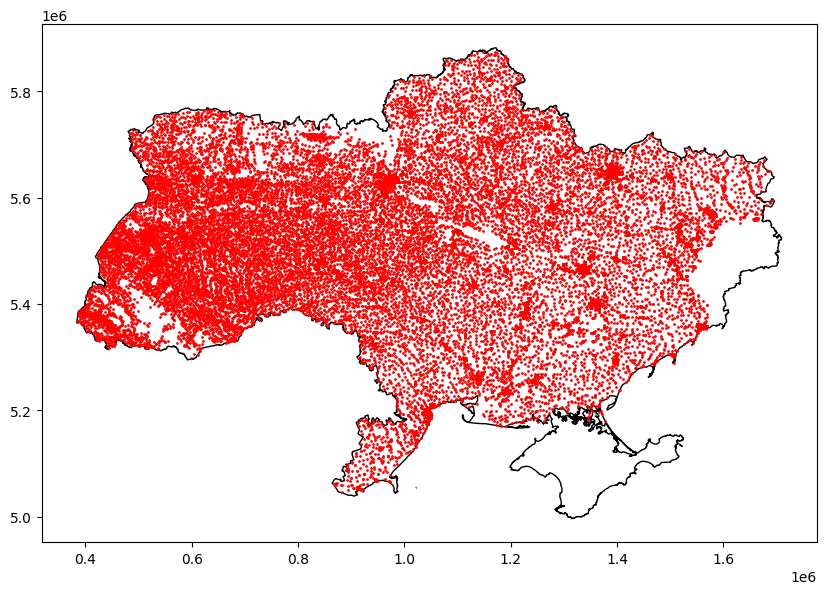

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [18]:
gdf_ukraine_adm_2 = gpd.read_file('../data/Ukraine_ShapeFiles/ukr_admbnda_adm2_sspe_20230201.shp')
gdf_ukraine_adm_2.head()

ADM2_EN          ADM2_UA         ADM2_RU ADM2_PCODE ADM2_REF  \
0  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский     UA0102     None   
1       Bilohirskyi     Білогірський     Белогорский     UA0104     None   
2      Dzhankoiskyi     Джанкойський     Джанкойский     UA0106     None   
3    Yevpatoriiskyi   Євпаторійський   Евпаторийский     UA0108     None   
4       Kerchynskyi      Керченський      Керченский     UA0110     None   

                         ADM1_EN                    ADM1_UA  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   
1  Autonomous Republic of Crimea  Автономна Республіка Крим   
2  Autonomous Republic of Crimea  Автономна Республіка Крим   
3  Autonomous Republic of Crimea  Автономна Республіка Крим   
4  Autonomous Republic of Crimea  Автономна Республіка Крим   

                      ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU  \
0  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
1  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
2  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
3  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
4  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   

  ADM0_PCODE        date     validOn validTo  Shape_Leng  Shape_Area  \
0         UA  2023-01-30  2023-02-01    None    3.835411    0.270255   
1         UA  2023-01-30  2023-02-01    None    5.565672    0.335566   
2         UA  2023-01-30  2023-02-01    None    8.921192    0.251445   
3         UA  2023-01-30  2023-02-01    None    4.813707    0.444439   
4         UA  2023-01-30  2023-02-01    None    5.979506    0.346806   

                                            geometry  
0  POLYGON ((33.64833 44.90969, 33.64858 44.90894...  
1  MULTIPOLYGON (((35.06130 45.57474, 35.06100 45...  
2  MULTIPOLYGON (((34.69742 45.71048, 34.69734 45...  
3  POLYGON ((33.09983 45.71323, 33.10027 45.71321...  
4  MULTIPOLYGON (((35.45832 45.27045, 35.45806 45...

In [19]:
gdf_ukraine_adm_2 = gdf_ukraine_adm_2.to_crs(epsg=6381)

<Axes: >

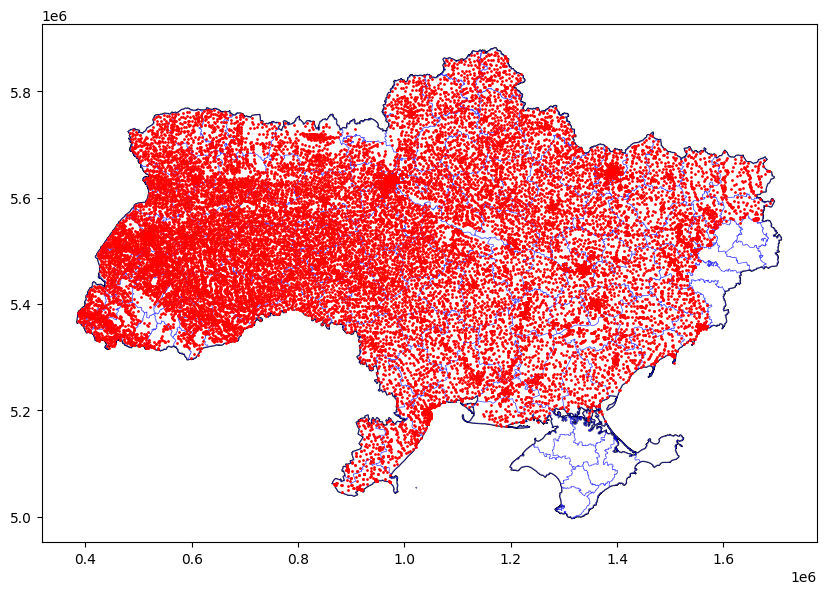

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='red', markersize=1)

In [21]:
gdf_firms_all_war = gpd.read_file('../data/FIRMS_2402_1123/fire_nrt_J1V-C2_397288.shp')
gdf_firms_all_war.head()

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK    ACQ_DATE ACQ_TIME  \
0  47.86332   33.43287      314.90  0.69   0.74  2022-02-24     0113   
1  47.86949   33.43061      335.02  0.69   0.74  2022-02-24     0113   
2  47.87542   33.39306      298.27  0.68   0.74  2022-02-24     0113   
3  47.87539   33.44268      312.47  0.69   0.74  2022-02-24     0113   
4  47.86940   33.38816      302.86  0.68   0.74  2022-02-24     0113   

  SATELLITE INSTRUMENT CONFIDENCE VERSION  BRIGHT_T31   FRP DAYNIGHT  \
0         1      VIIRS          n  2.0NRT      269.87  5.53        N   
1         1      VIIRS          n  2.0NRT      270.24  5.46        N   
2         1      VIIRS          n  2.0NRT      271.78  1.67        N   
3         1      VIIRS          n  2.0NRT      269.82  3.01        N   
4         1      VIIRS          n  2.0NRT      272.16  1.67        N   

                    geometry  
0  POINT (33.43287 47.86332)  
1  POINT (33.43061 47.86949)  
2  POINT (33.39306 47.87542)  
3  POINT (33.44268 47.87539)  
4  POINT (33.38816 47.86940)

In [22]:
gdf_firms_all_war = gdf_firms_all_war.to_crs(epsg=6381)

In [23]:
# Filter gdf_firms_all_war to acq_date between 2023-10-01 and 2023-10-31
gdf_firms_out_2023 = gdf_firms_all_war[(gdf_firms_all_war['ACQ_DATE'] >= '2023-10-01') & (gdf_firms_all_war['ACQ_DATE'] <= '2023-10-31')]


<Axes: >

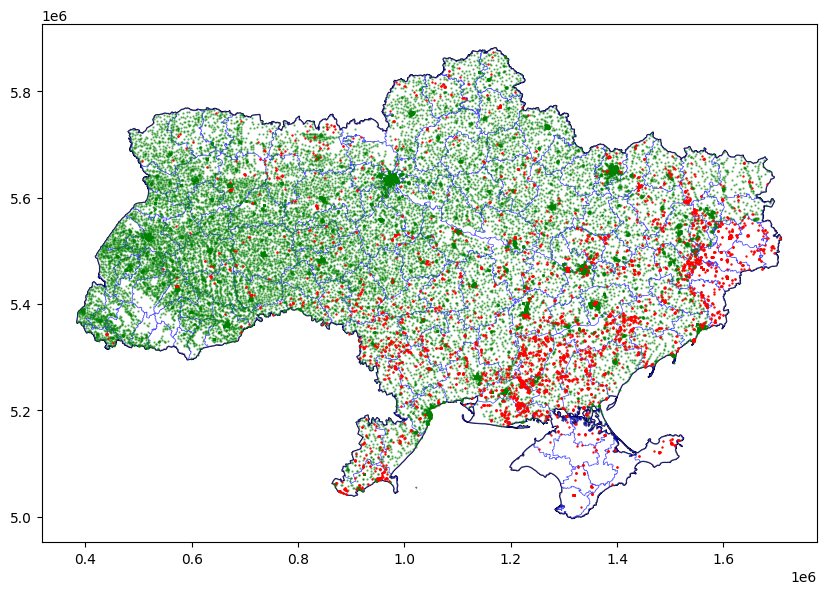

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.5)
gdf_results_uk_pull_stations.plot(ax=ax, color='green', markersize=0.5, alpha=0.5)
gdf_firms_out_2023.plot(ax=ax, color='red', markersize=0.5)

In [27]:
df_main_ukrain_candidates = pd.read_excel('../data/MainUkranianCandidates.xlsx')
df_main_ukrain_candidates.head()

Candidates        Ukranian Names Affiliation
0  Volodymyr Zelenskyy  Зеленський Володимир  Pro-Europe
1     Petro Poroshenko       Порошенко Петро  Pro-Europe
2          Yuriy Boyko            Бойко Юрій  Pro-Russia
3     Oleksandr Vilkul      Вілкул Олександр  Pro-Russia

In [28]:
print(gdf_results.columns)
for i in df_main_ukrain_candidates['Ukranian Names']:
    if i in gdf_results.columns:
        print(i)

Index(['tikId_x', 'name', 'voters', 'totalVotes', 'Балашов Геннадій',
       'Безсмертний Роман', 'Богомолець Ольга', 'Богословська Інна',
       'Бойко Юрій', 'Бондар Віктор', 'Ващенко Олександр', 'Вілкул Олександр',
       'Габер Микола', 'Гриценко Анатолій', 'Данилюк Олександр',
       'Дерев’янко Юрій', 'Журавльов Василь', 'Зеленський Володимир',
       'Каплін Сергій', 'Кармазін Юрій', 'Кива Ілля', 'Корнацький Аркадій',
       'Кошулинський Руслан', 'Кривенко Віктор', 'Купрій Віталій',
       'Литвиненко Юлія', 'Ляшко Олег', 'Мороз Олександр',
       'Наливайченко Валентин', 'Насіров Роман', 'Новак Андрій',
       'Носенко Сергій', 'Петров Володимир', 'Порошенко Петро',
       'Ригованов Руслан', 'Скоцик Віталій', 'Смешко Ігор',
       'Соловйов Олександр', 'Тарута Сергій', 'Тимошенко Юлія',
       'Тимошенко Юрій', 'Шевченко Ігор', 'Шевченко Олександр', 'id',
       'parent_id', 'level', 'region', 'tikId_y', 'city', 'lat', 'lon',
       'geometry'],
      dtype='object')
Зеленськ

In [29]:
print(list(df_main_ukrain_candidates['Ukranian Names']))

['Зеленський Володимир', 'Порошенко Петро', 'Бойко Юрій', 'Вілкул Олександр']


In [30]:
gdf_results_filtered_columns = ['tikId_x', 'name', 'voters', 'totalVotes', 'Зеленський Володимир', 'Порошенко Петро', 'Бойко Юрій', 'Вілкул Олександр', 'id',
       'parent_id', 'level', 'region', 'tikId_y', 'city', 'lat', 'lon',
       'geometry']

gdf_results_filtered = gdf_results[gdf_results_filtered_columns]
gdf_results_filtered.head()

tikId_x         name  voters  totalVotes  Зеленський Володимир  \
0      11  ВД № 050130    1686        1121                   232   
1      11  ВД № 050131    2109        1358                   319   
2      11  ВД № 050132    1282         841                   204   
3      11  ВД № 050133    2434        1594                   320   
4      11  ВД № 050134     225         140                    36   

   Порошенко Петро  Бойко Юрій  Вілкул Олександр     id  parent_id  level  \
0              370          32                11  228.0       27.0    3.0   
1              365          47                33  229.0       27.0    3.0   
2              247          41                10  230.0       27.0    3.0   
3              524          55                29  231.0       27.0    3.0   
4               39           1                 1  232.0       27.0    3.0   

              region tikId_y city        lat        lon  \
0  Вінницька область      11  NaN  49.306361  28.468460   
1  Вінницька область      11  NaN  49.308055  28.471841   
2  Вінницька область      11  NaN  49.310606  28.472663   
3  Вінницька область      11  NaN  49.304283  28.482872   
4  Вінницька область      11  NaN  49.331720  28.533021   

                         geometry  
0  POINT (843013.206 5490724.327)  
1  POINT (843240.017 5490936.859)  
2  POINT (843271.600 5491226.131)  
3  POINT (844082.924 5490597.619)  
4  POINT (847419.605 5494008.966)

In [31]:
# add column with other candidates votes count
gdf_results_filtered['other_candidates'] = gdf_results_filtered['totalVotes'] - gdf_results_filtered['Зеленський Володимир'] - gdf_results_filtered['Порошенко Петро'] - gdf_results_filtered['Бойко Юрій'] - gdf_results_filtered['Вілкул Олександр']

c:\Users\Bernardo\Documents\Insper\8Sem\georeferenced-information-class\project\Proj-Geo\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
gdf_results_filtered.head()

tikId_x         name  voters  totalVotes  Зеленський Володимир  \
0      11  ВД № 050130    1686        1121                   232   
1      11  ВД № 050131    2109        1358                   319   
2      11  ВД № 050132    1282         841                   204   
3      11  ВД № 050133    2434        1594                   320   
4      11  ВД № 050134     225         140                    36   

   Порошенко Петро  Бойко Юрій  Вілкул Олександр     id  parent_id  level  \
0              370          32                11  228.0       27.0    3.0   
1              365          47                33  229.0       27.0    3.0   
2              247          41                10  230.0       27.0    3.0   
3              524          55                29  231.0       27.0    3.0   
4               39           1                 1  232.0       27.0    3.0   

              region tikId_y city        lat        lon  \
0  Вінницька область      11  NaN  49.306361  28.468460   
1  Вінницька область      11  NaN  49.308055  28.471841   
2  Вінницька область      11  NaN  49.310606  28.472663   
3  Вінницька область      11  NaN  49.304283  28.482872   
4  Вінницька область      11  NaN  49.331720  28.533021   

                         geometry  other_candidates  
0  POINT (843013.206 5490724.327)               476  
1  POINT (843240.017 5490936.859)               594  
2  POINT (843271.600 5491226.131)               339  
3  POINT (844082.924 5490597.619)               666  
4  POINT (847419.605 5494008.966)                63

In [33]:
# import data from data/language.csv from "" "" "" csv format
gdf_ukraine_adm_2.shape

(139, 19)

In [34]:
gdf_results_filtered.shape

(32552, 18)

# Coletando Dados de linguagem 

In [35]:
# Import data from data/gdf_ukraine_adm_2_lang_perc.csv
gdf_ukraine_adm_2_lang_perc = gpd.read_file('../data/UKR_ADM2_GEO_LANG_PERC/gdf_ukraine_adm_2_lang_perc.shp')

gdf_ukraine_adm_2_lang_perc.head()

ID_0  ISO   NAME_0  ID_1    NAME_1  ID_2          NAME_2    HASC_2  CCN_2  \
0   240  UKR  Ukraine     1  Cherkasy     1       cherkaska  UA.CK.CM      0   
1   240  UKR  Ukraine     1  Cherkasy     2      cherkaskyi  UA.CK.CR      0   
2   240  UKR  Ukraine     1  Cherkasy     3  chornobaivskyi  UA.CK.CB      0   
3   240  UKR  Ukraine     1  Cherkasy     4    chyhyrynskyi  UA.CK.CY      0   
4   240  UKR  Ukraine     1  Cherkasy     5      drabivskyi  UA.CK.DR      0   

  CCA_2       TYPE_2    ENGTYPE_2 NL_NAME_2        VARNAME_2            Name  \
0  None  Mis'ka Rada  Mis'ka Rada      None             None       cherkaska   
1  None        Raion     District      None             None      cherkaskyi   
2  None        Raion     District      None  Chornobayivskyi  chornobaivskyi   
3  None        Raion     District      None             None    chyhyrynskyi   
4  None        Raion     District      None             None      drabivskyi   

  Ukrainian Russian             prev_name  Whole popu  \
0     79.07   18.67   CHERKASY (miskrada)    293556.0   
1     96.84    2.91      CHERKASKYI RAION     78346.0   
2     97.29    2.27  CHORNOBAIVSKYI RAION     49741.0   
3     95.46    3.63    CHYHYRYNSKYI RAION     36111.0   
4     98.01    1.56      DRABIVSKYI RAION     42818.0   

                                            geometry  
0  POLYGON ((32.03880 49.49877, 32.05218 49.49868...  
1  POLYGON ((32.19797 49.20946, 32.18890 49.20953...  
2  POLYGON ((32.47975 49.30701, 32.47074 49.31886...  
3  POLYGON ((32.87844 49.22034, 32.87827 49.20856...  
4  POLYGON ((32.45570 49.93700, 32.45568 49.93112...

In [36]:
# Convert Ukrainian and Russian columns to float
gdf_ukraine_adm_2_lang_perc['Ukrainian'] = gdf_ukraine_adm_2_lang_perc['Ukrainian'].astype(float)
gdf_ukraine_adm_2_lang_perc['Russian'] = gdf_ukraine_adm_2_lang_perc['Russian'].astype(float)

In [37]:
# Update CRS
gdf_ukraine_adm_2_lang_perc = gdf_ukraine_adm_2_lang_perc.to_crs(epsg=6381)

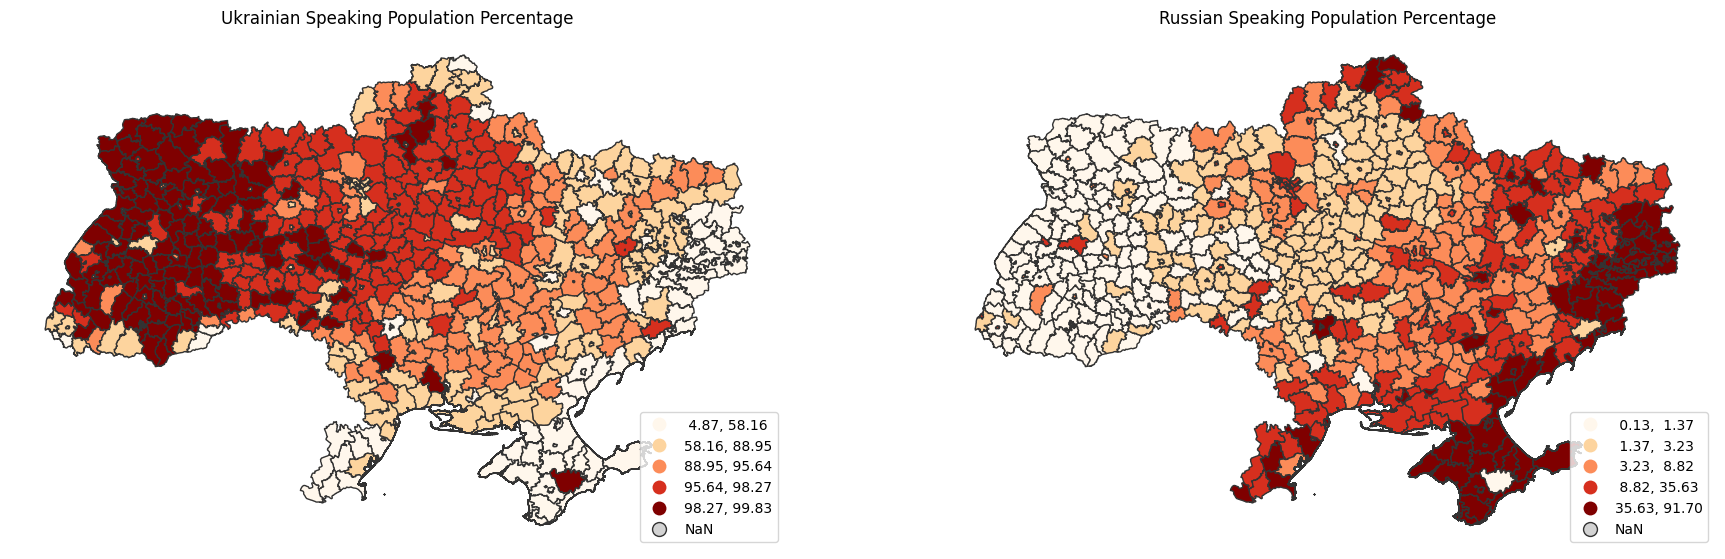

In [39]:
#plot language data not nan values
fig, axs = plt.subplots(1, 2, figsize=(22, 11))
gdf_ukraine_adm_2_lang_perc.plot(ax=axs[0], column='Ukrainian', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[0].set_title('Ukrainian Speaking Population Percentage')
axs[0].set_axis_off()

gdf_ukraine_adm_2_lang_perc.plot(ax=axs[1], column='Russian', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[1].set_title('Russian Speaking Population Percentage')
axs[1].set_axis_off()

# Exibindo os gráficos
plt.show()


## Atualizando regiões administrativas nível 2 dos dados de Linguagem

<Axes: >

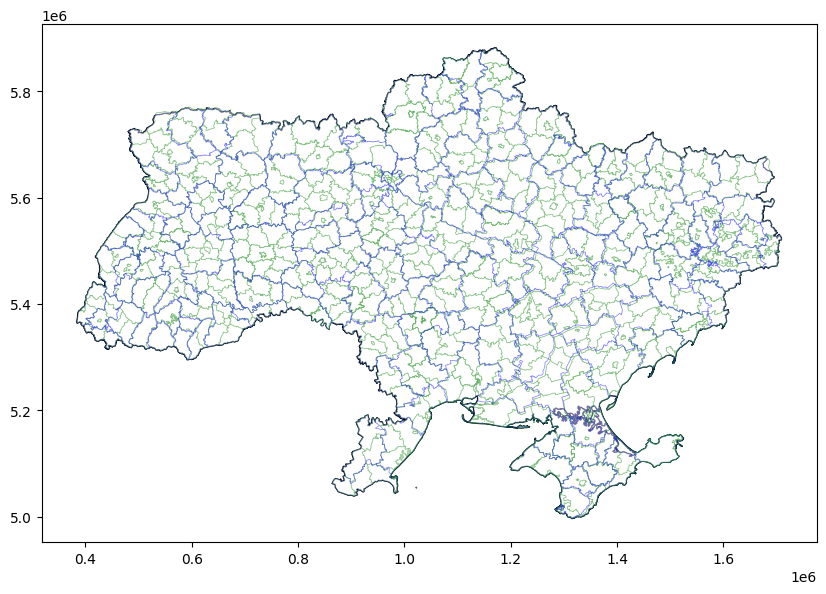

In [40]:
# Plot adm_2 with language data
fig, ax = plt.subplots(figsize=(10, 10))
gdf_ukraine_adm_0.plot(ax=ax, color='white', edgecolor='black')
gdf_ukraine_adm_2_lang_perc.plot(ax=ax,color='white', edgecolor='green', linewidth=0.5, alpha=0.5)
gdf_ukraine_adm_2.plot(ax=ax, color='white', edgecolor='blue', linewidth=0.5, alpha=0.3)

In [41]:
# Create new columns with absolute values of Ukrainian and Russian speaking population
gdf_ukraine_adm_2_lang_perc['Ukrainian_abs'] = gdf_ukraine_adm_2_lang_perc['Ukrainian'] * gdf_ukraine_adm_2_lang_perc['Whole popu'] / 100
gdf_ukraine_adm_2_lang_perc['Russian_abs'] = gdf_ukraine_adm_2_lang_perc['Russian'] * gdf_ukraine_adm_2_lang_perc['Whole popu'] / 100

# make copy of gdf_ukraine_adm_2_lang_perc
gdf_ukraine_adm_2_lang_perc_centroid = gdf_ukraine_adm_2_lang_perc.copy()

# Create new geometry column with centroid of each adm_2_land_perc
gdf_ukraine_adm_2_lang_perc_centroid['geometry'] = gdf_ukraine_adm_2_lang_perc_centroid['geometry'].centroid

In [42]:
# sjoin gdf_ukraine_adm_2 with gdf_ukraine_adm_2_lang_perc_centroid to a new gdf_ukraine_adm_2_lang_perc_updated
gdf_ukraine_adm_2_lang_perc_centroid_area_data = gpd.sjoin(gdf_ukraine_adm_2_lang_perc_centroid, gdf_ukraine_adm_2, how='left', op='within')
gdf_ukraine_adm_2_lang_perc_centroid_area_data.head()

c:\Users\Bernardo\Documents\Insper\8Sem\georeferenced-information-class\project\Proj-Geo\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ID_0  ISO   NAME_0  ID_1    NAME_1  ID_2          NAME_2    HASC_2  CCN_2  \
0   240  UKR  Ukraine     1  Cherkasy     1       cherkaska  UA.CK.CM      0   
1   240  UKR  Ukraine     1  Cherkasy     2      cherkaskyi  UA.CK.CR      0   
2   240  UKR  Ukraine     1  Cherkasy     3  chornobaivskyi  UA.CK.CB      0   
3   240  UKR  Ukraine     1  Cherkasy     4    chyhyrynskyi  UA.CK.CY      0   
4   240  UKR  Ukraine     1  Cherkasy     5      drabivskyi  UA.CK.DR      0   

  CCA_2       TYPE_2    ENGTYPE_2 NL_NAME_2        VARNAME_2            Name  \
0  None  Mis'ka Rada  Mis'ka Rada      None             None       cherkaska   
1  None        Raion     District      None             None      cherkaskyi   
2  None        Raion     District      None  Chornobayivskyi  chornobaivskyi   
3  None        Raion     District      None             None    chyhyrynskyi   
4  None        Raion     District      None             None      drabivskyi   

   Ukrainian  Russian             prev_name  Whole popu  \
0      79.07    18.67   CHERKASY (miskrada)    293556.0   
1      96.84     2.91      CHERKASKYI RAION     78346.0   
2      97.29     2.27  CHORNOBAIVSKYI RAION     49741.0   
3      95.46     3.63    CHYHYRYNSKYI RAION     36111.0   
4      98.01     1.56      DRABIVSKYI RAION     42818.0   

                          geometry  Ukrainian_abs  Russian_abs  index_right  \
0  POINT (1102385.707 5536473.611)    232114.7292   54806.9052        128.0   
1  POINT (1091900.050 5532151.977)     75870.2664    2279.8686        128.0   
2  POINT (1130237.956 5553469.368)     48393.0189    1129.1207        126.0   
3  POINT (1145264.625 5506713.743)     34471.5606    1310.8293        128.0   
4  POINT (1100028.897 5597852.177)     41965.9218     667.9608        126.0   

        ADM2_EN        ADM2_UA        ADM2_RU ADM2_PCODE ADM2_REF    ADM1_EN  \
0    Cherkaskyi     Черкаський     Черкасский     UA7108     None  Cherkaska   
1    Cherkaskyi     Черкаський     Черкасский     UA7108     None  Cherkaska   
2  Zolotoniskyi  Золотоніський  Золотоношский     UA7104     None  Cherkaska   
3    Cherkaskyi     Черкаський     Черкасский     UA7108     None  Cherkaska   
4  Zolotoniskyi  Золотоніський  Золотоношский     UA7104     None  Cherkaska   

     ADM1_UA     ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU ADM0_PCODE  \
0  Черкаська  Черкасская       UA71  Ukraine  Україна  Украина         UA   
1  Черкаська  Черкасская       UA71  Ukraine  Україна  Украина         UA   
2  Черкаська  Черкасская       UA71  Ukraine  Україна  Украина         UA   
3  Черкаська  Черкасская       UA71  Ukraine  Україна  Украина         UA   
4  Черкаська  Черкасская       UA71  Ukraine  Україна  Украина         UA   

         date     validOn validTo  Shape_Leng  Shape_Area  
0  2023-01-30  2023-02-01    None    8.034104    0.851804  
1  2023-01-30  2023-02-01    None    8.034104    0.851804  
2  2023-01-30  2023-02-01    None    4.652279    0.530888  
3  2023-01-30  2023-02-01    None    8.034104    0.851804  
4  2023-01-30  2023-02-01    None    4.652279    0.530888

In [43]:
grouped_data = gdf_ukraine_adm_2_lang_perc_centroid_area_data.groupby('ADM2_PCODE').agg({
    'Ukrainian_abs': 'sum',
    'Russian_abs': 'sum',
    'Whole popu': 'sum'
}).reset_index()

grouped_data.head()

ADM2_PCODE  Ukrainian_abs  Russian_abs  Whole popu
0     UA0102      9644.7341   89830.3455    120829.0
1     UA0104    110933.2217  101568.8262    253306.0
2     UA0106      3257.4360   35634.6354     42861.0
3     UA0108     31536.3255  198827.4257    261163.0
4     UA0110     16256.1063  202109.1849    237223.0

In [44]:
# Merge grouped_data with gdf_ukraine_adm_2 and name it gdf_ukraine_adm_2_lang_perc_area_updated
gdf_ukraine_adm_2_lang_perc_area_updated = pd.merge(gdf_ukraine_adm_2, grouped_data, left_on='ADM2_PCODE', right_on='ADM2_PCODE', how='left')
gdf_ukraine_adm_2_lang_perc_area_updated.head()

ADM2_EN          ADM2_UA         ADM2_RU ADM2_PCODE ADM2_REF  \
0  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский     UA0102     None   
1       Bilohirskyi     Білогірський     Белогорский     UA0104     None   
2      Dzhankoiskyi     Джанкойський     Джанкойский     UA0106     None   
3    Yevpatoriiskyi   Євпаторійський   Евпаторийский     UA0108     None   
4       Kerchynskyi      Керченський      Керченский     UA0110     None   

                         ADM1_EN                    ADM1_UA  \
0  Autonomous Republic of Crimea  Автономна Республіка Крим   
1  Autonomous Republic of Crimea  Автономна Республіка Крим   
2  Autonomous Republic of Crimea  Автономна Республіка Крим   
3  Autonomous Republic of Crimea  Автономна Республіка Крим   
4  Autonomous Republic of Crimea  Автономна Республіка Крим   

                      ADM1_RU ADM1_PCODE  ADM0_EN  ADM0_UA  ADM0_RU  \
0  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
1  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
2  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
3  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   
4  Автономная Республика Крым       UA01  Ukraine  Україна  Украина   

  ADM0_PCODE        date     validOn validTo  Shape_Leng  Shape_Area  \
0         UA  2023-01-30  2023-02-01    None    3.835411    0.270255   
1         UA  2023-01-30  2023-02-01    None    5.565672    0.335566   
2         UA  2023-01-30  2023-02-01    None    8.921192    0.251445   
3         UA  2023-01-30  2023-02-01    None    4.813707    0.444439   
4         UA  2023-01-30  2023-02-01    None    5.979506    0.346806   

                                            geometry  Ukrainian_abs  \
0  POLYGON ((1298952.868 5053508.956, 1298985.671...      9644.7341   
1  MULTIPOLYGON (((1397370.402 5146071.302, 13973...    110933.2217   
2  MULTIPOLYGON (((1366369.907 5156134.629, 13663...      3257.4360   
3  POLYGON ((1242038.579 5136063.282, 1242073.502...     31536.3255   
4  MULTIPOLYGON (((1434532.605 5117903.262, 14345...     16256.1063   

   Russian_abs  Whole popu  
0   89830.3455    120829.0  
1  101568.8262    253306.0  
2   35634.6354     42861.0  
3  198827.4257    261163.0  
4  202109.1849    237223.0

In [45]:
# Create new columns with percentage of Ukrainian and Russian speaking population
gdf_ukraine_adm_2_lang_perc_area_updated['Ukrainian_perc'] = gdf_ukraine_adm_2_lang_perc_area_updated['Ukrainian_abs'] / gdf_ukraine_adm_2_lang_perc_area_updated['Whole popu'] * 100
gdf_ukraine_adm_2_lang_perc_area_updated['Russian_perc'] = gdf_ukraine_adm_2_lang_perc_area_updated['Russian_abs'] / gdf_ukraine_adm_2_lang_perc_area_updated['Whole popu'] * 100

# Select only columns that will be used: Ukrainian_abs, Ukrainian_perc, Russian_abs, Russian_perc, 'Whole popu', 'ADM2_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'geometry'
gdf_ukraine_adm_2_lang_perc_area_updated = gdf_ukraine_adm_2_lang_perc_area_updated[['Ukrainian_abs', 'Ukrainian_perc', 'Russian_abs', 'Russian_perc', 'Whole popu', 'ADM2_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'geometry']]
gdf_ukraine_adm_2_lang_perc_area_updated.head()

Ukrainian_abs  Ukrainian_perc  Russian_abs  Russian_perc  Whole popu  \
0      9644.7341        7.982135   89830.3455     74.345021    120829.0   
1    110933.2217       43.794155  101568.8262     40.097284    253306.0   
2      3257.4360        7.600000   35634.6354     83.140000     42861.0   
3     31536.3255       12.075342  198827.4257     76.131545    261163.0   
4     16256.1063        6.852669  202109.1849     85.197972    237223.0   

  ADM2_PCODE           ADM2_EN          ADM2_UA         ADM2_RU  \
0     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский   
1     UA0104       Bilohirskyi     Білогірський     Белогорский   
2     UA0106      Dzhankoiskyi     Джанкойський     Джанкойский   
3     UA0108    Yevpatoriiskyi   Євпаторійський   Евпаторийский   
4     UA0110       Kerchynskyi      Керченський      Керченский   

                                            geometry  
0  POLYGON ((1298952.868 5053508.956, 1298985.671...  
1  MULTIPOLYGON (((1397370.402 5146071.302, 13973...  
2  MULTIPOLYGON (((1366369.907 5156134.629, 13663...  
3  POLYGON ((1242038.579 5136063.282, 1242073.502...  
4  MULTIPOLYGON (((1434532.605 5117903.262, 14345...

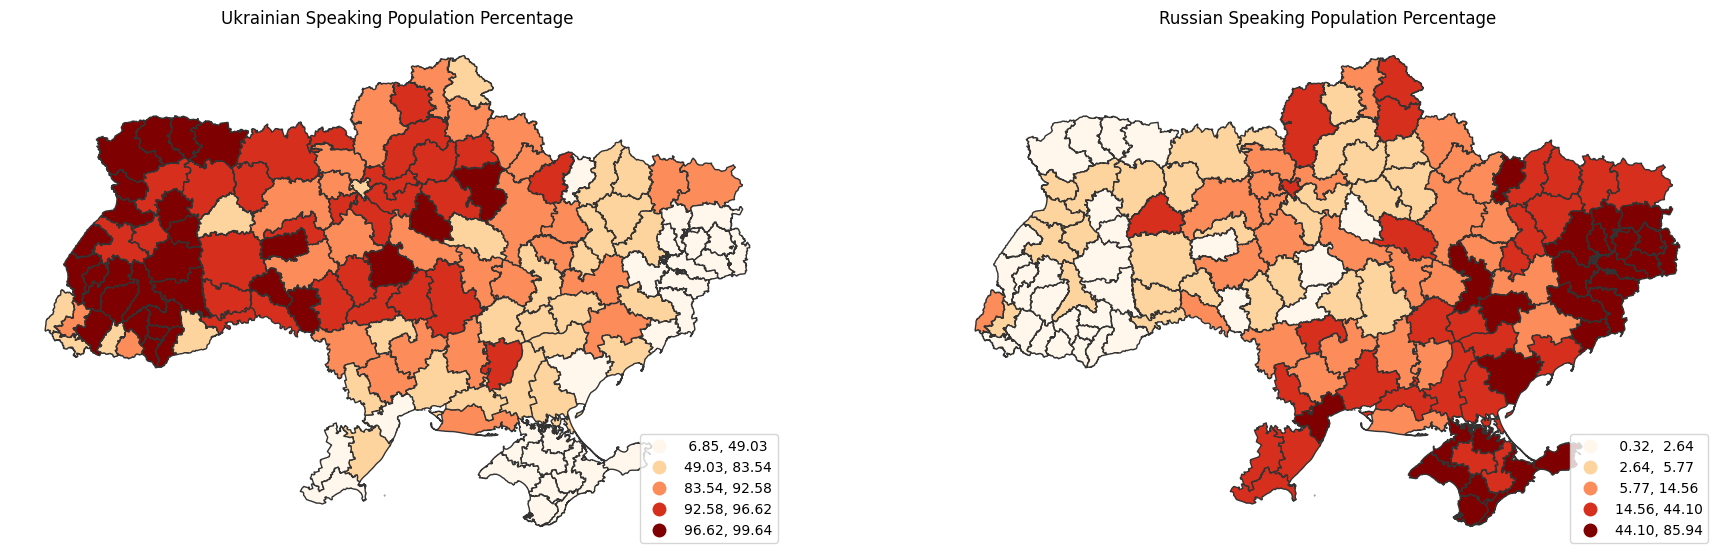

In [46]:
#plot language data not nan values
fig, axs = plt.subplots(1, 2, figsize=(22, 11))
gdf_ukraine_adm_2_lang_perc_area_updated.plot(ax=axs[0], column='Ukrainian_perc', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[0].set_title('Ukrainian Speaking Population Percentage')
axs[0].set_axis_off()

gdf_ukraine_adm_2_lang_perc_area_updated.plot(ax=axs[1], column='Russian_perc', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[1].set_title('Russian Speaking Population Percentage')
axs[1].set_axis_off()

# Exibindo os gráficos
plt.show()

## Agrupando dados do FIRMS por área, mês e ano

In [47]:
# Sjoin gdf_firms_all_war within gdf_ukrain_adm_2
gdf_firms_all_war_area = gpd.sjoin(gdf_firms_all_war, gdf_ukraine_adm_2, how='left', op='within')

c:\Users\Bernardo\Documents\Insper\8Sem\georeferenced-information-class\project\Proj-Geo\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [48]:
# Parse ACQ_DATE to month and year
gdf_firms_all_war_area['ACQ_DATE'] = pd.to_datetime(gdf_firms_all_war_area['ACQ_DATE'])
gdf_firms_all_war_area['month'] = gdf_firms_all_war_area['ACQ_DATE'].dt.month
gdf_firms_all_war_area['year'] = gdf_firms_all_war_area['ACQ_DATE'].dt.year

In [49]:
# groupby ADM2_PCODE, month and year, and reduce by count
gdf_firms_all_war_area_grouped = gdf_firms_all_war_area.groupby(['ADM2_PCODE', 'month', 'year']).agg({
    'ACQ_DATE': 'count'
}).reset_index()

# rename ACQ_DATE to fires_count
gdf_firms_all_war_area_grouped = gdf_firms_all_war_area_grouped.rename(columns={'ACQ_DATE': 'fires_count'})

gdf_firms_all_war_area_grouped.head()

ADM2_PCODE  month  year  fires_count
0     UA0102      1  2023            5
1     UA0102      2  2023            1
2     UA0102      3  2022            8
3     UA0102      3  2023           11
4     UA0102      4  2022           12

In [50]:
# Merge gdf_firms_all_war_area_grouped with gdf_ukraine_adm_2 and name it gdf_ukraine_adm_2_firms_all_war
gdf_ukraine_adm_2_firms_all_war = pd.merge(gdf_ukraine_adm_2, gdf_firms_all_war_area_grouped, left_on='ADM2_PCODE', right_on='ADM2_PCODE', how='left')

#choose only columns that will be used
gdf_ukraine_adm_2_firms_all_war = gdf_ukraine_adm_2_firms_all_war[['ADM2_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'month', 'year', 'fires_count', 'geometry']]
gdf_ukraine_adm_2_firms_all_war.head()

ADM2_PCODE           ADM2_EN          ADM2_UA         ADM2_RU  month  year  \
0     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский      1  2023   
1     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский      2  2023   
2     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский      3  2022   
3     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский      3  2023   
4     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский      4  2022   

   fires_count                                           geometry  
0            5  POLYGON ((1298952.868 5053508.956, 1298985.671...  
1            1  POLYGON ((1298952.868 5053508.956, 1298985.671...  
2            8  POLYGON ((1298952.868 5053508.956, 1298985.671...  
3           11  POLYGON ((1298952.868 5053508.956, 1298985.671...  
4           12  POLYGON ((1298952.868 5053508.956, 1298985.671...

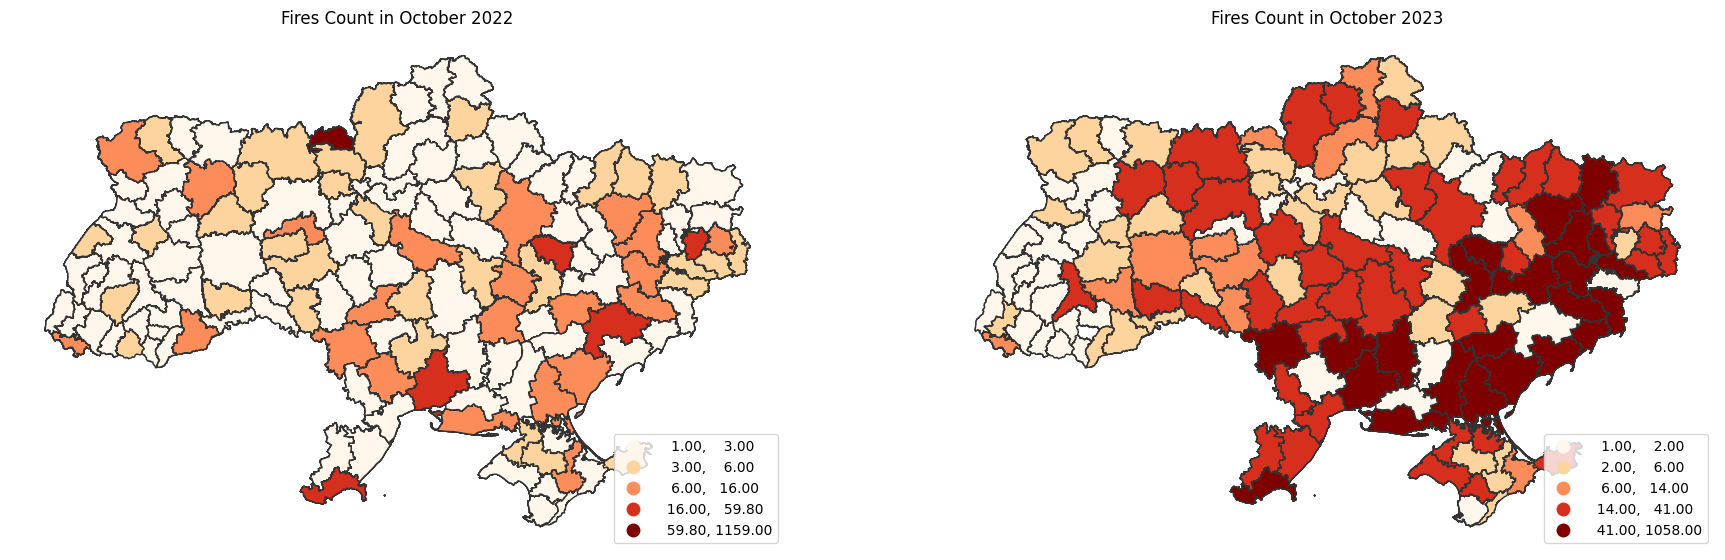

In [51]:
# Plot fires_count in October 2022 and October 2023
fig, axs = plt.subplots(1, 2, figsize=(22, 11))
gdf_ukraine_adm_2_firms_all_war[gdf_ukraine_adm_2_firms_all_war['year'] == 2022].plot(ax=axs[0], column='fires_count', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[0].set_title('Fires Count in October 2022')
axs[0].set_axis_off()

gdf_ukraine_adm_2_firms_all_war[gdf_ukraine_adm_2_firms_all_war['year'] == 2023].plot(ax=axs[1], column='fires_count', scheme='quantiles', cmap='OrRd', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[1].set_title('Fires Count in October 2023')
axs[1].set_axis_off()

# Exibindo os gráficos
plt.show()

## Agrupando dados de votação nas áreas

In [52]:
gdf_results_uk_pull_stations.head()

tikId_x         name  voters  totalVotes  Балашов Геннадій  \
0      11  ВД № 050130    1686        1121                 3   
1      11  ВД № 050131    2109        1358                 1   
2      11  ВД № 050132    1282         841                 1   
3      11  ВД № 050133    2434        1594                 2   
4      11  ВД № 050134     225         140                 1   

   Безсмертний Роман  Богомолець Ольга  Богословська Інна  Бойко Юрій  \
0                  2                 2                  0          32   
1                  2                 1                  2          47   
2                  0                 2                  1          41   
3                  0                 4                  2          55   
4                  0                 1                  0           1   

   Бондар Віктор  Ващенко Олександр  Вілкул Олександр  Габер Микола  \
0              0                  0                11             0   
1              1                  1                33             0   
2              0                  0                10             0   
3              1                  1                29             0   
4              0                  0                 1             0   

   Гриценко Анатолій  Данилюк Олександр  Дерев’янко Юрій  Журавльов Василь  \
0                 73                  0                2                 1   
1                 97                  0                0                 0   
2                 48                  0                1                 1   
3                 94                  1                1                 0   
4                 12                  0                0                 0   

   Зеленський Володимир  Каплін Сергій  Кармазін Юрій  Кива Ілля  \
0                   232              0              0          0   
1                   319              1              1          1   
2                   204              0              0          3   
3                   320              0              0          1   
4                    36              0              0          0   

   Корнацький Аркадій  Кошулинський Руслан  Кривенко Віктор  Купрій Віталій  \
0                   0                   17                0               0   
1                   1                   23                0               1   
2                   0                   12                0               0   
3                   0                   31                2               0   
4                   0                    3                0               0   

   Литвиненко Юлія  Ляшко Олег  Мороз Олександр  Наливайченко Валентин  \
0                1          45                1                      2   
1                1          46                0                      4   
2                1          35                0                      1   
3                2          61                1                      7   
4                0           3                1                      1   

   Насіров Роман  Новак Андрій  Носенко Сергій  Петров Володимир  \
0              0             0               1                 0   
1              0             0               0                 1   
2              0             0               0                 2   
3              0             1               0                 0   
4              0             0               0                 0   

   Порошенко Петро  Ригованов Руслан  Скоцик Віталій  Смешко Ігор  \
0              370                 1               1          120   
1              365                 0               2          147   
2              247                 0               0           95   
3              524                 0               3          186   
4               39                 0               0           14   

   Соловйов Олександр  Тарута Сергій  Тимошенко Юлія  Тимошенко Юрій  \
0                   0              0             169     

In [59]:
main_ukrain_candidates_names = df_main_ukrain_candidates['Ukranian Names'].tolist()
other_columns = ['tikId_x', 'name', 'voters', 'totalVotes', 'id', 'geometry']

gdf_results_uk_pull_stations_filtered = gdf_results_uk_pull_stations[main_ukrain_candidates_names + other_columns]

In [60]:
# Sjoin gdf_results_uk_pull_stations_filtered with gdf_ukraine_adm_2
gdf_results_uk_pull_stations_filtered_area = gpd.sjoin(gdf_results_uk_pull_stations_filtered, gdf_ukraine_adm_2, how='left', op='within')

# Groupby ADM2_PCODE and reduce by sum
results_uk_pull_stations_filtered_area_grouped = gdf_results_uk_pull_stations_filtered_area.groupby(['ADM2_PCODE']).agg(
    {name: 'sum' for name in main_ukrain_candidates_names + ['voters', 'totalVotes']}
).reset_index()

# Merge results_uk_pull_stations_filtered_area_grouped with gdf_ukraine_adm_2 and name it gdf_ukraine_adm_2_results_ukr_pull_stations
gdf_ukraine_adm_2_results_ukr_pull_stations = pd.merge(gdf_ukraine_adm_2, results_uk_pull_stations_filtered_area_grouped, left_on='ADM2_PCODE', right_on='ADM2_PCODE', how='left')

# Filter gdf_ukraine_adm_2_results_ukr_pull_stations to only columns that will be used
gdf_ukraine_adm_2_results_ukr_pull_stations = gdf_ukraine_adm_2_results_ukr_pull_stations[['ADM2_PCODE', 'ADM2_EN', 'ADM2_UA', 'ADM2_RU', 'geometry', 'voters', 'totalVotes'] + main_ukrain_candidates_names]

gdf_ukraine_adm_2_results_ukr_pull_stations

c:\Users\Bernardo\Documents\Insper\8Sem\georeferenced-information-class\project\Proj-Geo\lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ADM2_PCODE             ADM2_EN              ADM2_UA             ADM2_RU  \
0       UA0102    Bakhchysaraiskyi      Бахчисарайський      Бахчисарайский   
1       UA0104         Bilohirskyi         Білогірський         Белогорский   
2       UA0106        Dzhankoiskyi         Джанкойський         Джанкойский   
3       UA0108      Yevpatoriiskyi       Євпаторійський       Евпаторийский   
4       UA0110         Kerchynskyi          Керченський          Керченский   
..         ...                 ...                  ...                 ...   
134     UA7406  Novhorod-Siverskyi  Новгород-Сіверський  Новгород-Северский   
135     UA7408          Prylutskyi           Прилуцький          Прилукский   
136     UA7410       Chernihivskyi        Чернігівський        Черниговский   
137     UA8000                Kyiv                 Київ                Киев   
138     UA8500          Sevastopol          Севастополь         Севастополь   

                                              geometry     voters  totalVotes  \
0    POLYGON ((1298952.868 5053508.956, 1298985.671...        NaN         NaN   
1    MULTIPOLYGON (((1397370.402 5146071.302, 13973...        NaN         NaN   
2    MULTIPOLYGON (((1366369.907 5156134.629, 13663...        NaN         NaN   
3    POLYGON ((1242038.579 5136063.282, 1242073.502...        NaN         NaN   
4    MULTIPOLYGON (((1434532.605 5117903.262, 14345...        NaN         NaN   
..                                                 ...        ...         ...   
134  MULTIPOLYGON (((1116943.715 5786480.488, 11171...    80873.0     59258.0   
135  POLYGON ((1108329.693 5718558.041, 1108727.782...   131490.0     86404.0   
136  POLYGON ((1013239.738 5830910.762, 1013245.801...   388233.0    268053.0   
137  POLYGON ((988790.604 5651772.969, 990139.762 5...  2237710.0   1544926.0   
138  MULTIPOLYGON (((1301666.355 5009968.529, 13019...        NaN         NaN   

     Зеленський Володимир  Порошенко Петро  Бойко Юрій  Вілкул Олександр  
0                     NaN              NaN         NaN               NaN  
1                     NaN              NaN         NaN               NaN  
2                     NaN              NaN         NaN               NaN  
3                     NaN              NaN         NaN               NaN  
4                     NaN              NaN         NaN               NaN  
..                    ...              ...         ...               ...  
134               18553.0           6788.0      4540.0            1407.0  
135               20015.0           9882.0      4644.0            1407.0  
136               79633.0          37318.0     20534.0            7578.0  
137              429114.0         386891.0     93838.0           33332.0  
138                   NaN              NaN         NaN               NaN  

[139 rows x 11 columns]

In [61]:
# Add column with percentage of votes for each candidate
for name in main_ukrain_candidates_names:
    gdf_ukraine_adm_2_results_ukr_pull_stations[name + '_perc'] = gdf_ukraine_adm_2_results_ukr_pull_stations[name] / gdf_ukraine_adm_2_results_ukr_pull_stations['totalVotes'] * 100;

gdf_ukraine_adm_2_results_ukr_pull_stations

ADM2_PCODE             ADM2_EN              ADM2_UA             ADM2_RU  \
0       UA0102    Bakhchysaraiskyi      Бахчисарайський      Бахчисарайский   
1       UA0104         Bilohirskyi         Білогірський         Белогорский   
2       UA0106        Dzhankoiskyi         Джанкойський         Джанкойский   
3       UA0108      Yevpatoriiskyi       Євпаторійський       Евпаторийский   
4       UA0110         Kerchynskyi          Керченський          Керченский   
..         ...                 ...                  ...                 ...   
134     UA7406  Novhorod-Siverskyi  Новгород-Сіверський  Новгород-Северский   
135     UA7408          Prylutskyi           Прилуцький          Прилукский   
136     UA7410       Chernihivskyi        Чернігівський        Черниговский   
137     UA8000                Kyiv                 Київ                Киев   
138     UA8500          Sevastopol          Севастополь         Севастополь   

                                              geometry     voters  totalVotes  \
0    POLYGON ((1298952.868 5053508.956, 1298985.671...        NaN         NaN   
1    MULTIPOLYGON (((1397370.402 5146071.302, 13973...        NaN         NaN   
2    MULTIPOLYGON (((1366369.907 5156134.629, 13663...        NaN         NaN   
3    POLYGON ((1242038.579 5136063.282, 1242073.502...        NaN         NaN   
4    MULTIPOLYGON (((1434532.605 5117903.262, 14345...        NaN         NaN   
..                                                 ...        ...         ...   
134  MULTIPOLYGON (((1116943.715 5786480.488, 11171...    80873.0     59258.0   
135  POLYGON ((1108329.693 5718558.041, 1108727.782...   131490.0     86404.0   
136  POLYGON ((1013239.738 5830910.762, 1013245.801...   388233.0    268053.0   
137  POLYGON ((988790.604 5651772.969, 990139.762 5...  2237710.0   1544926.0   
138  MULTIPOLYGON (((1301666.355 5009968.529, 13019...        NaN         NaN   

     Зеленський Володимир  Порошенко Петро  Бойко Юрій  Вілкул Олександр  \
0                     NaN              NaN         NaN               NaN   
1                     NaN              NaN         NaN               NaN   
2                     NaN              NaN         NaN               NaN   
3                     NaN              NaN         NaN               NaN   
4                     NaN              NaN         NaN               NaN   
..                    ...              ...         ...               ...   
134               18553.0           6788.0      4540.0            1407.0   
135               20015.0           9882.0      4644.0            1407.0   
136               79633.0          37318.0     20534.0            7578.0   
137              429114.0         386891.0     93838.0           33332.0   
138                   NaN              NaN         NaN               NaN   

     Зеленський Володимир_perc  Порошенко Петро_perc  Бойко Юрій_perc  \
0                          NaN                   NaN              NaN   
1                          NaN                   NaN              NaN   
2                          NaN                   NaN              NaN   
3                          NaN                   NaN              NaN   
4                          NaN                   NaN              NaN   
..                         ...                   ...              ...   
134                  31.308853             11.454993         7.661413   
135                  23.164437             11.436971         5.374751   
136                  29.707931             13.921874         7.660425   
137                  27.775699             25.042688         6.073948   
138                        NaN                   NaN              NaN   

     Вілкул Олександр_perc  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
..                     ...  
134               2.374363  
135               1.628397  
136               2.827053  
13

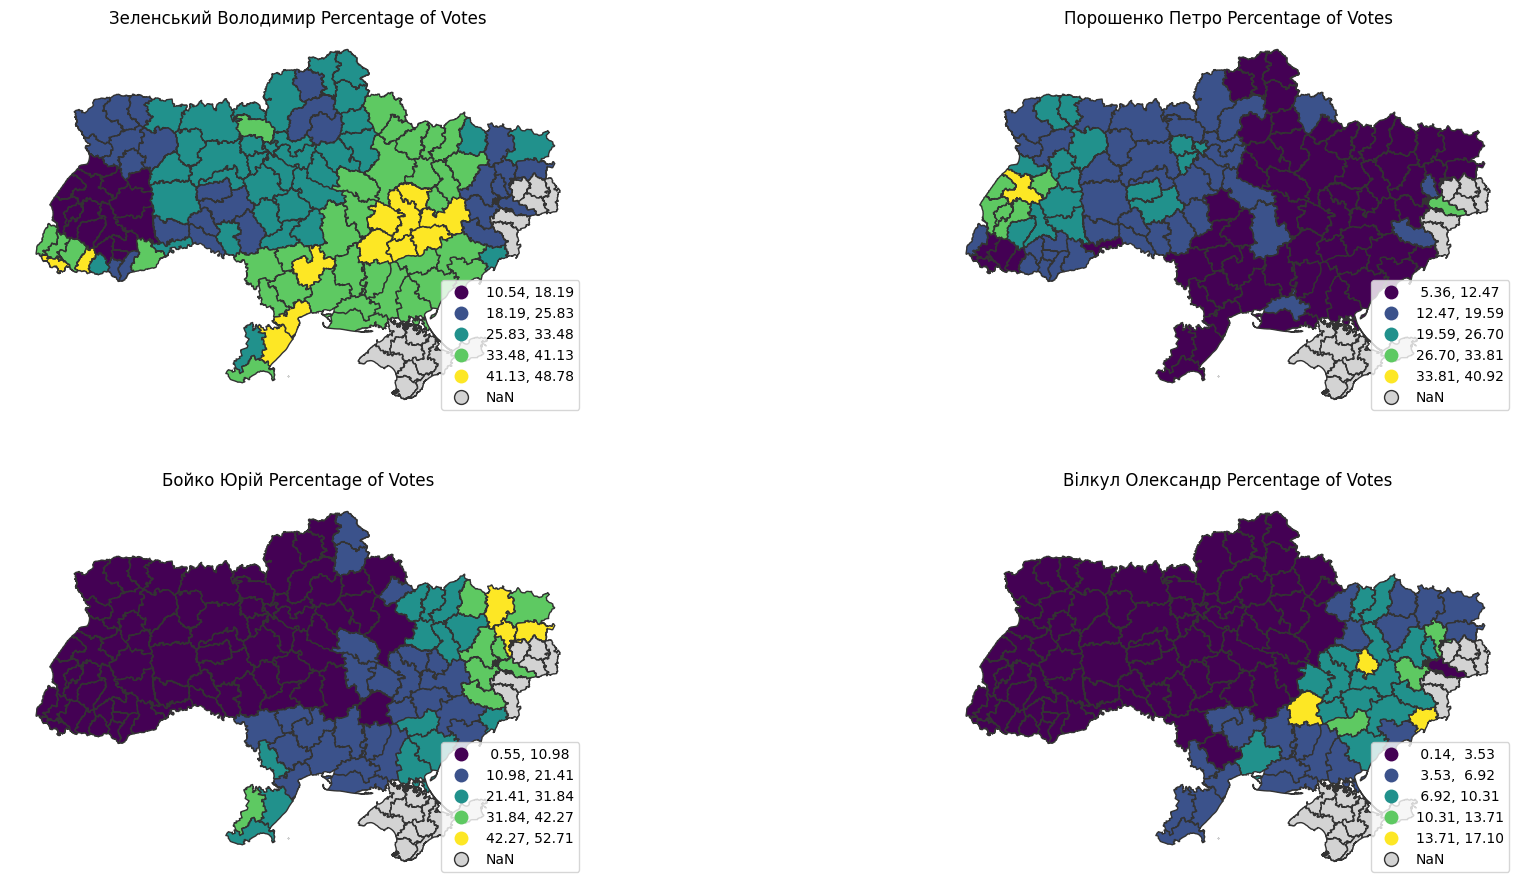

In [62]:
# Plot percentage of votes for each candidate in a different plot
fig, axs = plt.subplots(2, 2, figsize=(22, 11))
for i, name in enumerate(main_ukrain_candidates_names):
    gdf_ukraine_adm_2_results_ukr_pull_stations.plot(ax=axs[i//2, i%2], column=name + '_perc', scheme='equalinterval', cmap='viridis', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
    axs[i//2, i%2].set_title(name + ' Percentage of Votes')
    axs[i//2, i%2].set_axis_off()

# Exibindo os gráficos
plt.show()


In [66]:
# translate candidates names to english
candidates_names_dict = {
    'Зеленський Володимир': 'Volodymyr Zelensky',
    'Порошенко Петро': 'Petro Poroshenko',
    'Бойко Юрій': 'Yuriy Boiko',
    'Вілкул Олександр': 'Oleksandr Vilkul'
}

gdf_ukraine_adm_2_results_ukr_pull_stations = gdf_ukraine_adm_2_results_ukr_pull_stations.rename(columns=candidates_names_dict)

# rename columns with ukranian names + '_perc' to english names + '_perc'
gdf_ukraine_adm_2_results_ukr_pull_stations = gdf_ukraine_adm_2_results_ukr_pull_stations.rename(columns={name + '_perc': candidates_names_dict[name] + '_perc' for name in main_ukrain_candidates_names})

gdf_ukraine_adm_2_results_ukr_pull_stations.head()

ADM2_PCODE           ADM2_EN          ADM2_UA         ADM2_RU  \
0     UA0102  Bakhchysaraiskyi  Бахчисарайський  Бахчисарайский   
1     UA0104       Bilohirskyi     Білогірський     Белогорский   
2     UA0106      Dzhankoiskyi     Джанкойський     Джанкойский   
3     UA0108    Yevpatoriiskyi   Євпаторійський   Евпаторийский   
4     UA0110       Kerchynskyi      Керченський      Керченский   

                                            geometry  voters  totalVotes  \
0  POLYGON ((1298952.868 5053508.956, 1298985.671...     NaN         NaN   
1  MULTIPOLYGON (((1397370.402 5146071.302, 13973...     NaN         NaN   
2  MULTIPOLYGON (((1366369.907 5156134.629, 13663...     NaN         NaN   
3  POLYGON ((1242038.579 5136063.282, 1242073.502...     NaN         NaN   
4  MULTIPOLYGON (((1434532.605 5117903.262, 14345...     NaN         NaN   

   Volodymyr Zelensky  Petro Poroshenko  Yuriy Boiko  Oleksandr Vilkul  \
0                 NaN               NaN          NaN               NaN   
1                 NaN               NaN          NaN               NaN   
2                 NaN               NaN          NaN               NaN   
3                 NaN               NaN          NaN               NaN   
4                 NaN               NaN          NaN               NaN   

   Volodymyr Zelensky_perc  Petro Poroshenko_perc  Yuriy Boiko_perc  \
0                      NaN                    NaN               NaN   
1                      NaN                    NaN               NaN   
2                      NaN                    NaN               NaN   
3                      NaN                    NaN               NaN   
4                      NaN                    NaN               NaN   

   Oleksandr Vilkul_perc  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [69]:
# get list of english candidates names
main_ukrain_candidates_names_en = [candidates_names_dict[name] for name in main_ukrain_candidates_names]
main_ukrain_candidates_names_en

['Volodymyr Zelensky', 'Petro Poroshenko', 'Yuriy Boiko', 'Oleksandr Vilkul']

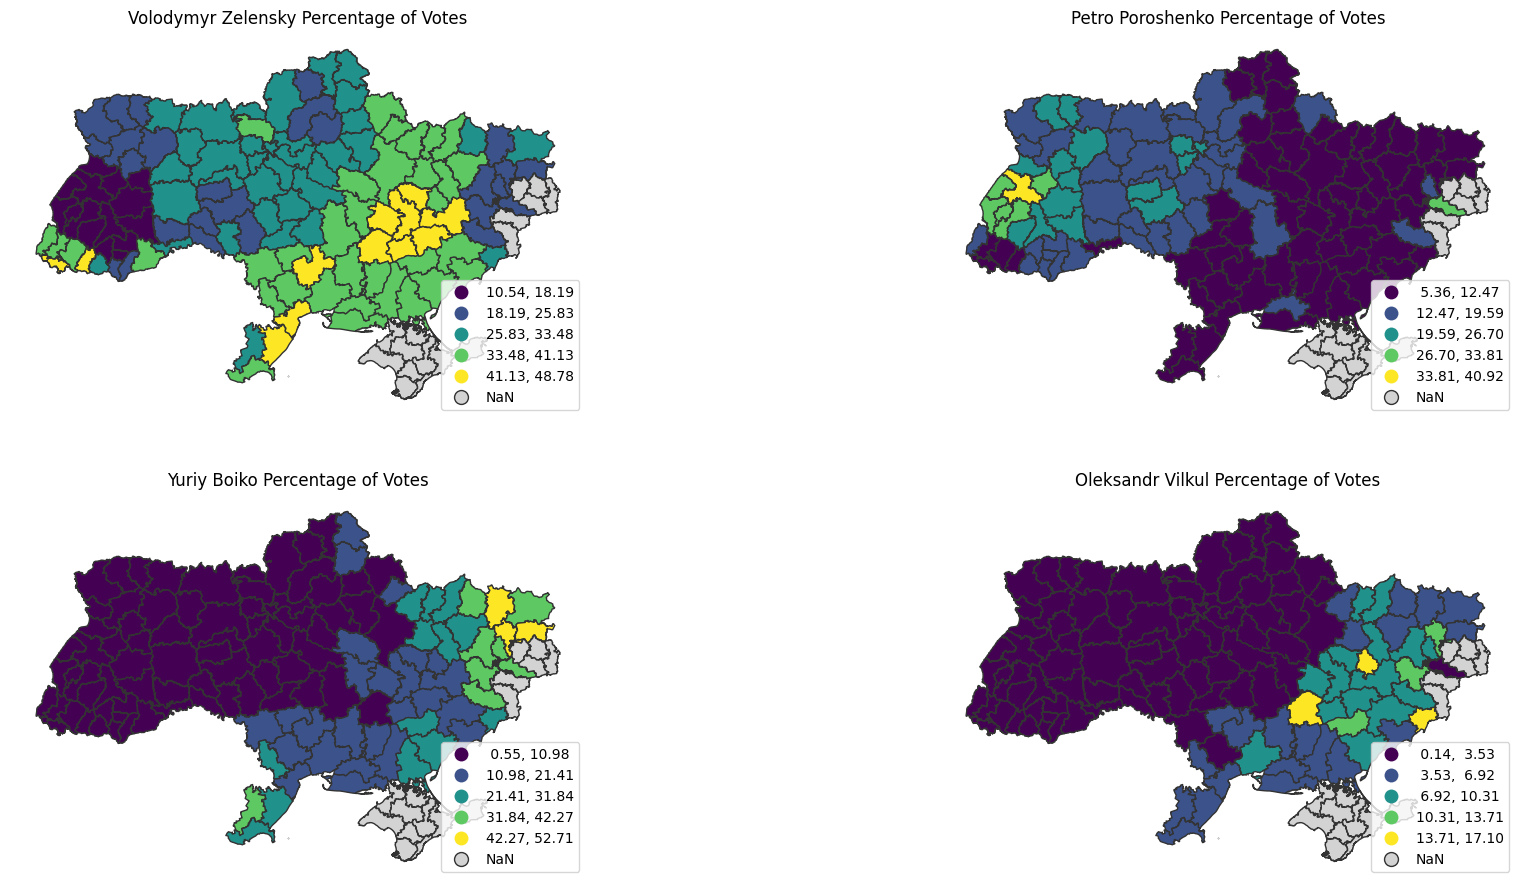

In [70]:
# Plot percentage of votes for each candidate in a different plot
fig, axs = plt.subplots(2, 2, figsize=(22, 11))
for i, name in enumerate(main_ukrain_candidates_names_en):
    gdf_ukraine_adm_2_results_ukr_pull_stations.plot(ax=axs[i//2, i%2], column=name + '_perc', scheme='equalinterval', cmap='viridis', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
    axs[i//2, i%2].set_title(name + ' Percentage of Votes')
    axs[i//2, i%2].set_axis_off()

# Exibindo os gráficos
plt.show()

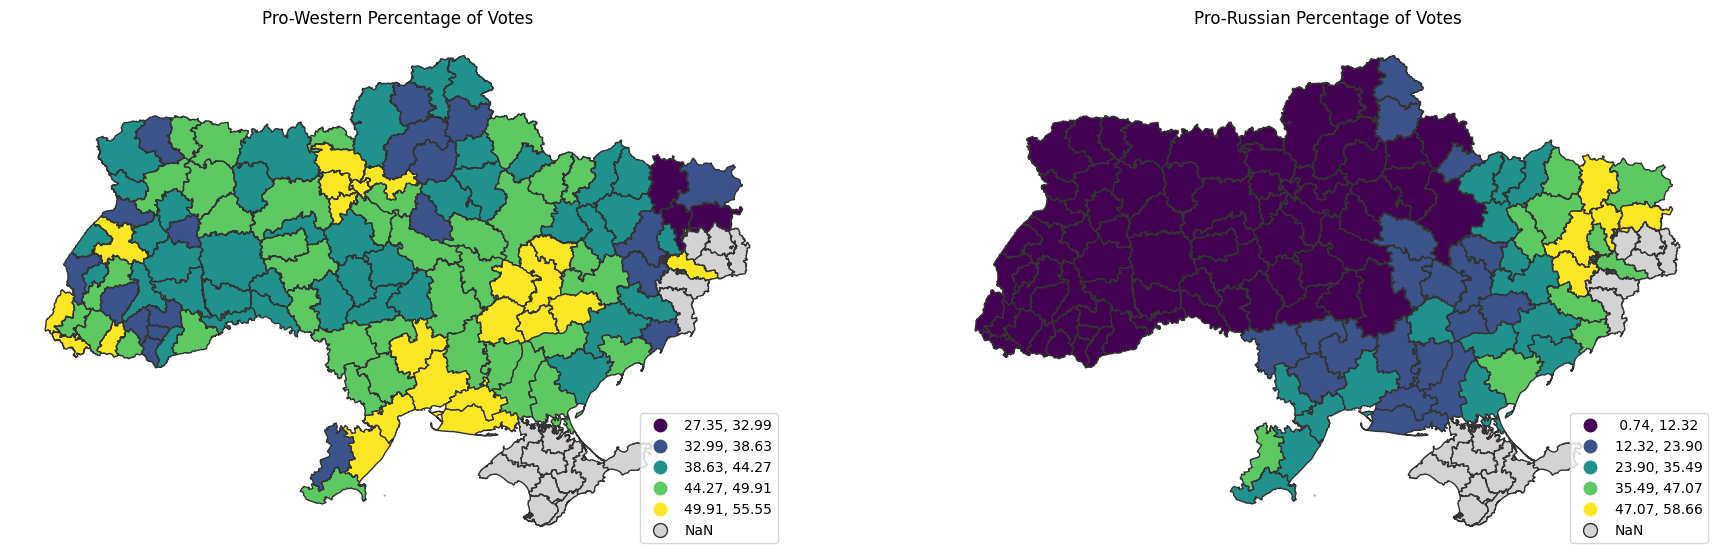

In [71]:
# join Zelensky and Poroshenko votes as pro-western column
gdf_ukraine_adm_2_results_ukr_pull_stations['pro_western_perc'] = gdf_ukraine_adm_2_results_ukr_pull_stations['Volodymyr Zelensky_perc'] + gdf_ukraine_adm_2_results_ukr_pull_stations['Petro Poroshenko_perc']

# join Boiko and Vilkul votes as pro-russian column
gdf_ukraine_adm_2_results_ukr_pull_stations['pro_russian_perc'] = gdf_ukraine_adm_2_results_ukr_pull_stations['Yuriy Boiko_perc'] + gdf_ukraine_adm_2_results_ukr_pull_stations['Oleksandr Vilkul_perc']

# Plot pro_western and pro_russian percentage of votes

fig, axs = plt.subplots(1, 2, figsize=(22, 11))
gdf_ukraine_adm_2_results_ukr_pull_stations.plot(ax=axs[0], column='pro_western_perc', scheme='equalinterval', cmap='viridis', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[0].set_title('Pro-Western Percentage of Votes')
axs[0].set_axis_off()

gdf_ukraine_adm_2_results_ukr_pull_stations.plot(ax=axs[1], column='pro_russian_perc', scheme='equalinterval', cmap='viridis', missing_kwds={'color': 'lightgrey'}, legend=True, legend_kwds={'loc': 'lower right'}, edgecolor="0.2")
axs[1].set_title('Pro-Russian Percentage of Votes')
axs[1].set_axis_off()

# Exibindo os gráficos
plt.show()